# Exercise 03 - Gradient descent, linear regression, and interpretability

After completing this notebook, you should be able to:
* implement gradient descent
* have an understanding how linear regression works
* how weights of a linear regression model can be interpreted

## Gradient Descent

We will use the 'digits' dataset consisting of 8x8 images of handwritten digits.

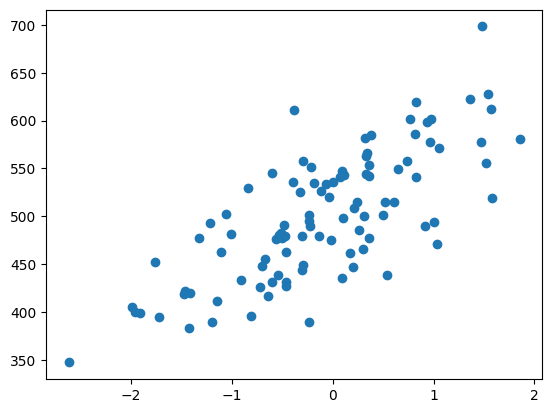

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# generate random dataset
X, y = datasets.make_regression(n_features=1, noise=50, random_state=42)
y = y + 500

# plot data
fig, ax = plt.subplots(1,1)
ax.scatter(X, y)

# TODO: notice the intercept!

In [4]:
# TODO: complete the linear regression function
def linear_regression(X, w=None, b=0):

    if w is None:
        w = np.zeros(X.shape[1])

    # TODO: fill in formula for linear regression in matrix notation
    y_pred = b + np.multiply(X, w) # TODO

    return y_pred

In [5]:
np.multiply(3, np.array([1,2]))

array([3, 6])

In [10]:
# calculating `y_pred` with weights `[0]` and bias `0`

w = np.array([1])
b = 350

y_pred = linear_regression(X, w=w, b=b)
print(y_pred)

[[350.93128012]
 [350.08704707]
 [348.94228907]
 [350.31424733]
 [349.52082576]
 [350.64768854]
 [349.53658231]
 [350.54256004]
 [350.61167629]
 [351.0035329 ]
 [350.8219025 ]
 [351.53803657]
 [350.73846658]
 [349.78032811]
 [349.1915064 ]
 [350.09176078]
 [348.04032988]
 [350.51326743]
 [351.03099952]
 [347.3802549 ]
 [350.49671415]
 [350.09707755]
 [349.53427025]
 [350.91540212]
 [351.56464366]
 [351.46564877]
 [349.39936131]
 [349.96417396]
 [349.39829339]
 [348.80379338]
 [350.35711257]
 [350.37569802]
 [350.26105527]
 [349.4702398 ]
 [349.09197592]
 [350.19686124]
 [349.70099265]
 [350.36163603]
 [350.82254491]
 [349.70830625]
 [350.36139561]
 [349.323078  ]
 [351.52302986]
 [349.48172978]
 [349.76584663]
 [349.60789185]
 [349.6988963 ]
 [349.35488025]
 [350.32875111]
 [350.2088636 ]
 [349.67233785]
 [350.00511346]
 [349.76586304]
 [351.47789404]
 [349.61491772]
 [350.34361829]
 [350.33126343]
 [349.81434102]
 [349.76541287]
 [348.01243109]
 [350.32408397]
 [349.7742237 ]
 [348.89

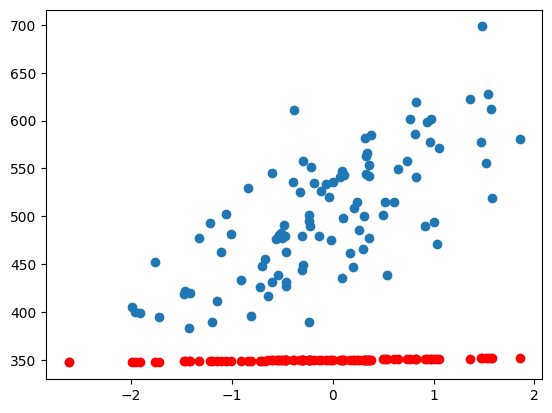

In [11]:
fig, ax = plt.subplots(1,1)
ax.scatter(X, y, label="data")
ax.scatter(X, y_pred, color="red", label="prediction")

In [ ]:
# TODO: implement a function to calculate the gradient for linear regression  (hint: use the matrix multiplication variant)
def linear_regression_derivative(X, y, w, b):
    gradient_w = ... # TODO
    gradient_b = 0 # TODO
    return gradient_w, gradient_b

In [ ]:
# TODO: fill in the weight update formula and play with the learning rate, what do you observe?

# starting configuration
w = np.array([0]); b = 0

# learning rate
learning_rate = 0.00001

# number of epochs
n_epochs = 1000

# training loop
for i_epoch in range(n_epochs):

    # calculate gradients
    gradient_w, gradient_b = linear_regression_derivative(X, y, w, b)

    # update gradients
    w = ... # TODO
    b = ... # TODO

    # plot current predictions
    if i_epoch % 100 == 0:
        fig, ax = plt.subplots(1,1)
        ax.scatter(X, y)
        y_pred = linear_regression(X, w=w, b=b)
        ax.scatter(X, y_pred, c="green")

# plot final predictions
fig, ax = plt.subplots(1,1)
ax.scatter(X, y)
y_pred = linear_regression(X, w=w, b=b)
ax.scatter(X, y_pred, c="green")

In [ ]:
# TODO: Bonus: plot the loss curve!

## Interpreting linear regression

We are working with the [titanic dataset](https://www.kaggle.com/competitions/titanic).

The following code plots feature importances for a linear model predicting passenger survival.
1) Try difference data splits. What do you observe for the feature importances?
1) Try adding and removing individual features. What do you observe?
1) Try scaling individual features and see how it affects the features. What do you observe?
1) Are the features that are considered important according to a model the only possibly important features to make predictions?
1) Sample feature importances using bootstrapping and plot them as boxplots. Which features are significant?

In [ ]:
# imports
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, RepeatedStratifiedKFold

from sklearn.pipeline import make_pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load data
data_titanic = pd.read_csv("titanic.csv", index_col="PassengerId")

In [ ]:
def extract_features(data):
    """Extract features from existing variables"""

    data_extract = data.copy()

    # name
    name_only = data_extract["Name"].str.replace(r"\(.*\)", "", regex=True)
    first_name = name_only.str.split(", ", expand=True).iloc[:,1]
    title = first_name.str.split(".", expand=True).iloc[:,0]
    data_extract["Title"] = title

    # ticket

    # ...

    return data_extract

data_extract = extract_features(data_titanic)

In [ ]:
def preprocess(data):
    """Convert features into numeric variables readable by our models."""

    data_preprocessed = data.copy()

    # Sex

    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Sex"], drop_first=True)

    # Cabin

    data_preprocessed.drop(columns="Cabin", inplace=True)

    # Embarked

    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Embarked"], dummy_na=True)

    # Title
    title = data_preprocessed["Title"]
    title_counts = title.value_counts()
    higher_titles = title_counts[title_counts < 50]
    title_groups = ["higher" if t in higher_titles else t for t in title]
    data_preprocessed["Title"] = title_groups
    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Title"])

    # drop the rest
    data_preprocessed.drop(columns=["Name", "Ticket"], inplace=True)

    return data_preprocessed

data_preprocessed = preprocess(data_extract)

In [ ]:

# before inspecting the data, selecting and building models, etc.
# FIRST split data into train and test data (we set the test data size to 30%)

X = data_preprocessed.drop(columns="Survived")
y = data_preprocessed["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [ ]:
imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()
preprocessing_pipeline = make_pipeline(scaler, imputer)


X_train_example = X_train.copy()

# drop features here
# ...

X_train_processed = preprocessing_pipeline.fit_transform(X_train_example)

# change `X_train_processed` for example here
# ...


# set model
model = LogisticRegression()

# fit for coefficient extraction
model.fit(X_train_processed, y_train)
feature_weights = model.coef_.flatten()

''

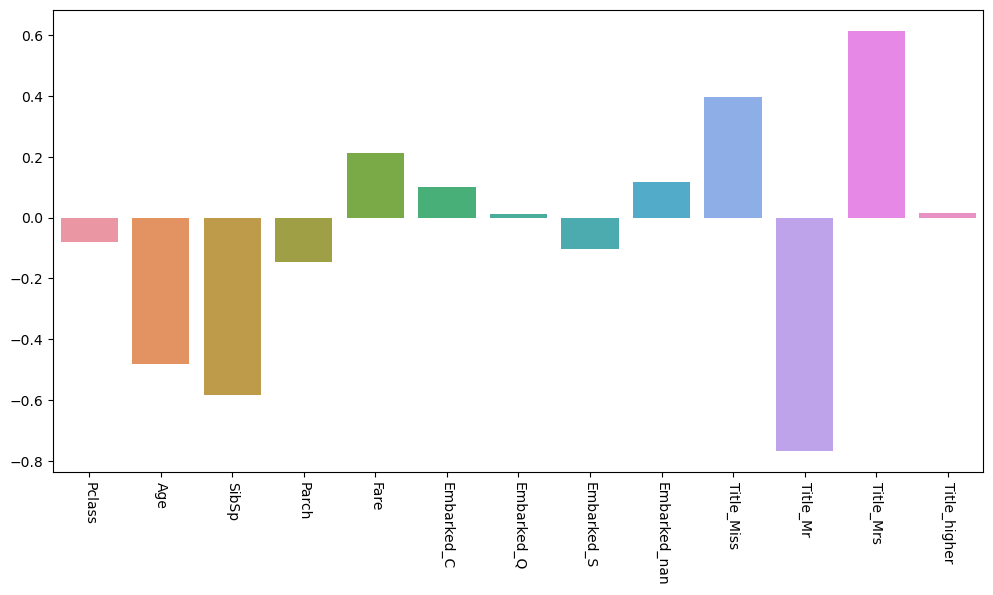

In [ ]:
# plot feature importances
fig, ax = plt.subplots(1, 1, figsize=(6 * 2, 6), sharey=True)
sns.barplot(x=X_train_example.columns, y=feature_weights, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=270)